In [1]:
import property_inference_interface
interface = property_inference_interface.PropertyInferenceInterface()

meta_params = {
    'first_class': 5, 
    'second_class': 7, 
    'size_of_train_set': 3000, 
    'size_of_test_set': 100,
    'subsample_ratio': 1, 
    'flatten': True, 
    
    'is_ran_per_included': False, 
    'ran_dist': 'uniform', 
    'uni_range': 0.2, 
    'normal_std': 0.1,
    
    'model_type': 'normal'
}

interface.set_meta_params(meta_params)
interface.print_meta_params()

Using TensorFlow backend.


first_class          : 5
second_class         : 7
size_of_train_set    : 3000
size_of_test_set     : 100
subsample_ratio      : 1
flatten              : True
is_ran_per_included  : False
ran_dist             : uniform
uni_range            : 0.2
normal_std           : 0.1
model_type           : normal


In [2]:
interface.prepare_dataset()
interface.print_dataset_shape()

Train dataset
(3000, 784) (3000,)
Test dataset
(100, 784) (100,)


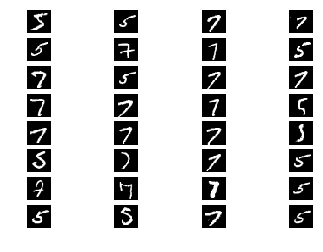

In [3]:
# Visualize the dataset
%matplotlib inline
interface.print_some_samples()

In [4]:
interface.generate_model()
interface.eval_model()

Model (train) accurancy: 1.0


1.0

In [ ]:
print('Display the architectur')
interface.model

Display the architectur


NormalC(
  (layer1): Linear(in_features=784, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=10, bias=True)
  (layer5): Linear(in_features=10, out_features=2, bias=True)
  (relu): ReLU()
)

In [ ]:
interface.generate_set_of_preconditions()
interface.print_set_of_preconditions()
num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F = interface.info_about_set_of_preconditions()

Length of each precondition (provenance): 64
Total Input Properties extracted for the first class: 1364
Total Input Properties extracted for the second class: 1636
Total Input Properties extracted for the first class (unique): 593
Total Input Properties extracted for the second class (unique): 390


In [ ]:
benign_detect_ratio, adversarial_detect_ratio = interface.evaluate_algorithm_on_test_set()

Evaluate on benign samples with test set
78 100 0.78
Evaluate on adversarial samples with test set
100 100 1.0


In [ ]:
exp_info = [num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F, benign_detect_ratio, adversarial_detect_ratio]
print(exp_info)

[1364, 1636, 593, 390, 0.78, 1.0]


In [ ]:
def single_exp():
    interface.generate_model()
    acc = interface.eval_model()
    if not (acc == 1.0):
        interface.generate_model()
        acc = interface.eval_model()
        
    interface.generate_set_of_preconditions()
    num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F = interface.info_about_set_of_preconditions()
    benign_detect_ratio, adversarial_detect_ratio = interface.evaluate_algorithm_on_test_set(verbose=True)
    exp_info = [num_first_F, num_second_F, num_unqi_fist_F, num_unqi_secon_F, benign_detect_ratio, adversarial_detect_ratio]
    return exp_info    

def exp(num_of_trails, file_name):
    cumulative_exp_info = []
    
    import csv 

    for i in range(num_of_trails):
        print('trail', (i+1))
        single_exp_info = single_exp()
        cumulative_exp_info.append(single_exp_info)

        with open(file_name, mode='a', newline='') as file:
            writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            writer.writerow(single_exp_info)
        file.close()

        print(single_exp_info)
        
    return cumulative_exp_info

file_name = 'test.csv'
cumulative_exp_info = exp(50, file_name)

trail 1
Model (train) accurancy: 1.0
Evaluate on benign samples with test set
78 100 0.78
Evaluate on adversarial samples with test set
100 100 1.0
[1364, 1636, 344, 517, 0.78, 1.0]
trail 2
